<div style="border:solid green 2px; padding: 20px"> 
    
Hello Jay, 
    
    
my name is Aleksandra. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v1</b> <a class="tocSkip"></a>
    
Jay, thanks a lot for the project! Great job! Everything is perfect. I can see that a lot of efforts have been made, and it turned out to be very strong. You work very carefully with data and you make qualitative assumptions - like a real analyst. There are no critical comments. I left guidance ones as we went along. Good luck at next steps!

# Optimization of Marketing Expenses for Yandex.Afisha
## 1) Introduction: 
### We have been provided with logs of visits, orders and costs. We need to learn how people use the product, when new customers first buy, the amount of revenue from each customer in a cohort, and how long before an investment in a new customer returns a profit. We have been tasked with turning this data into a recommendation for the marketing team.
## Step 1. Download the data and prepare it for analysis.

In [1]:
# Importing necessary packages.
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot as plt
import sidetable

In [3]:
try:
    visits = pd.read_csv('datasets/visits_log_us.csv')
    orders = pd.read_csv('datasets/orders_log_us.csv') 
    costs  = pd.read_csv('datasets/costs_us.csv') 
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv') 
    costs  = pd.read_csv('/datasets/costs_us.csv') 

In [3]:
# Let's add columns to our dataframes 
# And rename columns according to convention

# VISITS
visits = visits.rename(
    columns = {'Device': 'device',
               'End Ts': 'end_ts',
               'Source Id': 'source_id',
               'Start Ts': 'start_ts', 
               'Uid':'uid'}
)
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['date'] = visits['start_ts'].astype('datetime64[D]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')

# ORDERS
orders = orders.rename(
    columns = {'Buy Ts': 'buy_ts',
              'Revenue': 'revenue',
              'Uid':'uid'}
)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['date'] = orders['buy_ts'].astype('datetime64[D]')
orders['week'] = orders['buy_ts'].astype('datetime64[W]')
orders['month'] = orders['buy_ts'].astype('datetime64[M]')

# COSTS
costs['month']=costs['dt'].astype('datetime64[M]')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b> Great that you work with column names! In fact, we could rename them in one string by bring them to lowercase and change "" to "_"

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Dataframes usually contain data for several years. It is important to choose the correct method for drawing the month, otherwise months of different years can become one month (month method can lead to error). Great that you use astype('datetime64[M]') method. You do not need to call pd.DatetimeIndex.

## 2) Step 2: Make Reports and Calculate Metrics
## Products
### How many people use it every day?
## DAU

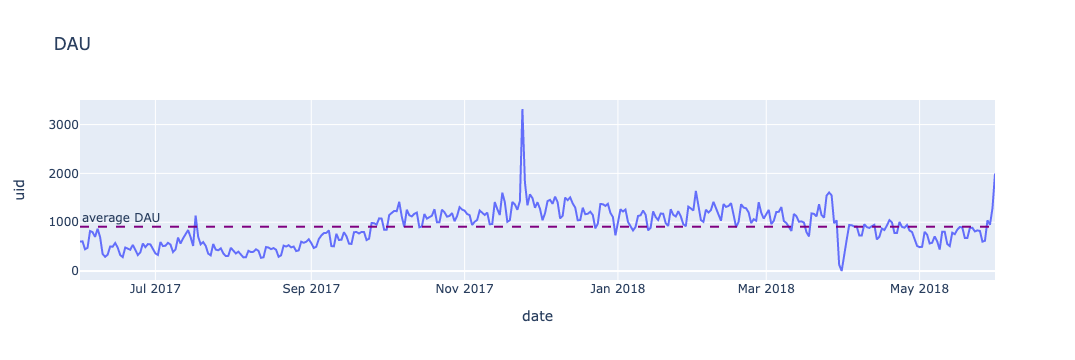

In [4]:
dau=visits.groupby(visits['date'])['uid'].nunique().reset_index()

fig = px.line(dau,x="date", y="uid",title='DAU')
#adding reference line with average DAU over time
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Correct

### 3) How many people use it every week?
## WAU

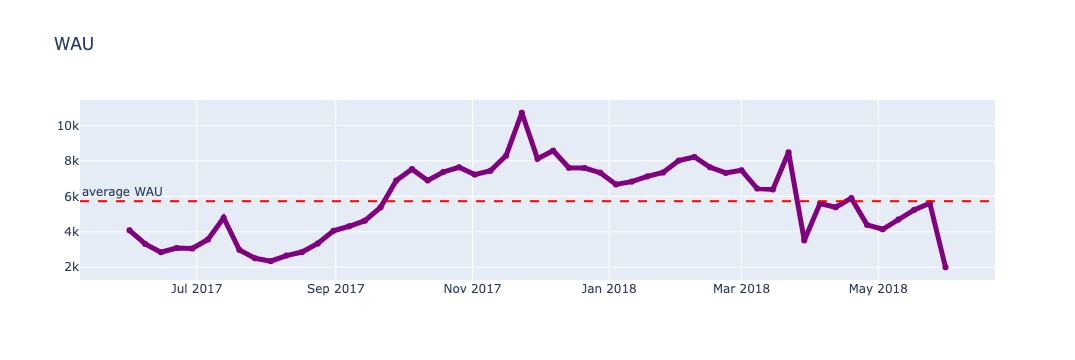

In [5]:
wau=visits.groupby(visits['week'])['uid'].nunique().reset_index()

fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="WAU")))
fig.add_trace(go.Scatter(x=wau['week'], 
                        y=wau['uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="red", annotation_text="average WAU",
             annotation_position="top left")
fig.show()

### 4) How many people use it every month?
## MAU

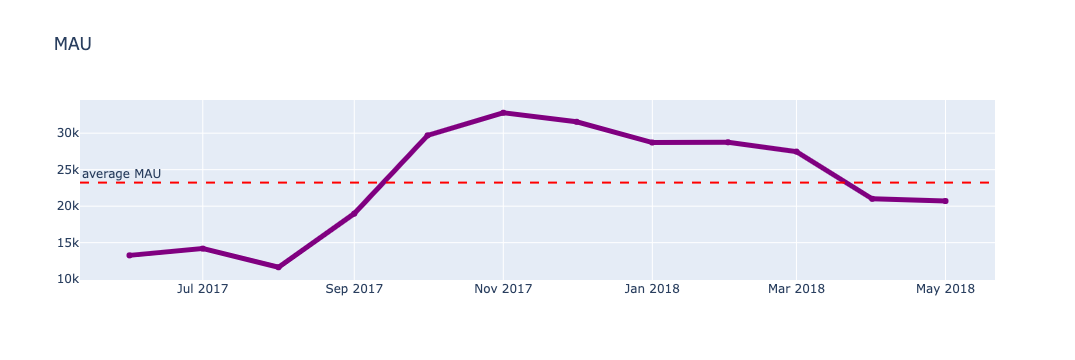

In [6]:
mau=visits.groupby(visits['month'])['uid'].nunique().reset_index()


fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="MAU")))
fig.add_trace(go.Scatter(x=mau['month'], 
                        y=mau['uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=mau['uid'].mean(),line_dash="dash", line_color="red", annotation_text="average MAU",
             annotation_position="top left")
fig.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Well done

### 5) How many sessions are there per day? 

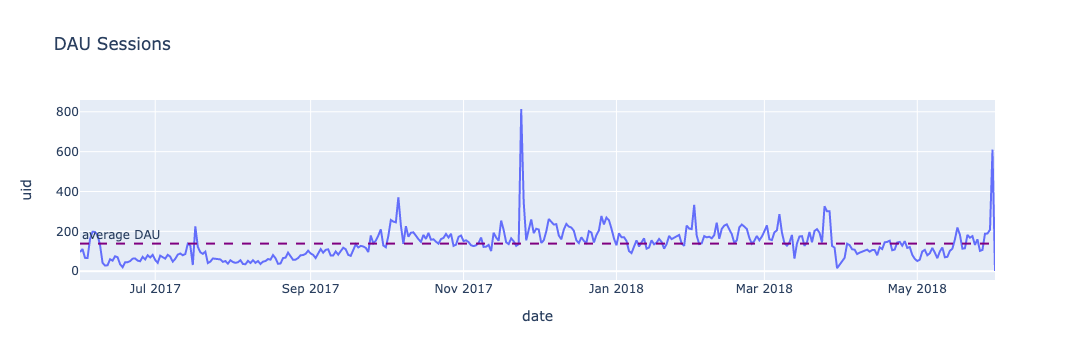

In [7]:
dau_sessions=orders.groupby(orders['date'])['uid'].count().reset_index()

fig = px.line(dau_sessions,x="date", y="uid",title='DAU Sessions')
#adding reference line with average DAU over time
fig.add_hline(y=dau_sessions['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

### 6) What is the length of each session?

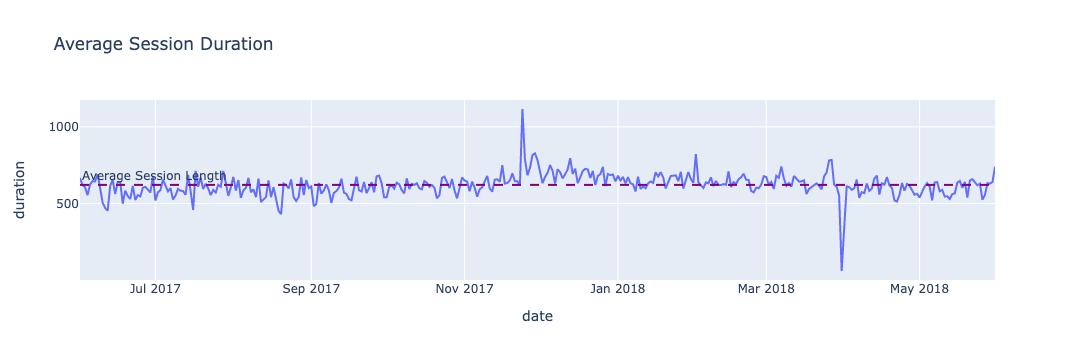

In [8]:
visits['duration'] = ((pd.to_datetime(visits['end_ts']) - pd.to_datetime(visits['start_ts'])) / np.timedelta64(1,'s'))\
                                                                        .round().astype('int')
session_length = visits.groupby(visits['date'])['duration'].mean().reset_index()
session_length

fig = px.line(session_length,x="date", y="duration",title='Average Session Duration')
fig.add_hline(y=session_length['duration'].mean(),line_dash="dash", line_color="purple", annotation_text="Average Session Length",
             annotation_position="top left")
fig.show()

### 7) How often do users come back?

In [9]:
first_visit = visits.groupby('uid')['month'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
visits=visits.merge(first_visit, how='inner',on=['uid'])
visits['cohort'] = visits['first_visit'].astype('datetime64[M]')
visits['age'] = ((visits['date'] - visits['first_visit']) / np.timedelta64(1,'M'))\
                                                                        .round().astype('int')

cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)

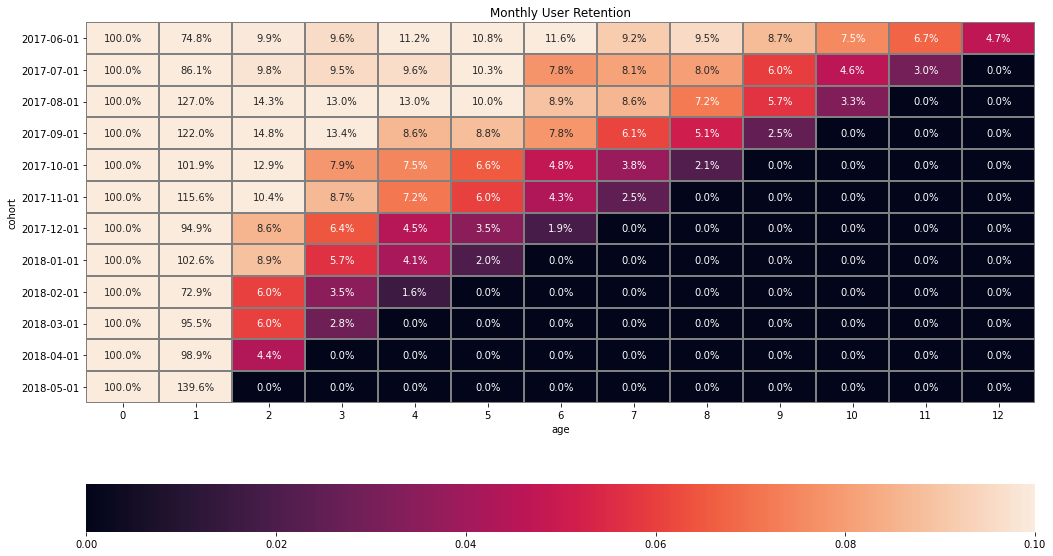

In [10]:
fig,ax=plt.subplots(figsize=(17,10))
retention.index=retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Monthly User Retention')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> You are right

### After the first few months, user engagement drops drastically. The later cohorts have a much steeper drop after two months than the earlier cohorts.  We should try to learn why.
## 8) Sales
### When do people start buying? 

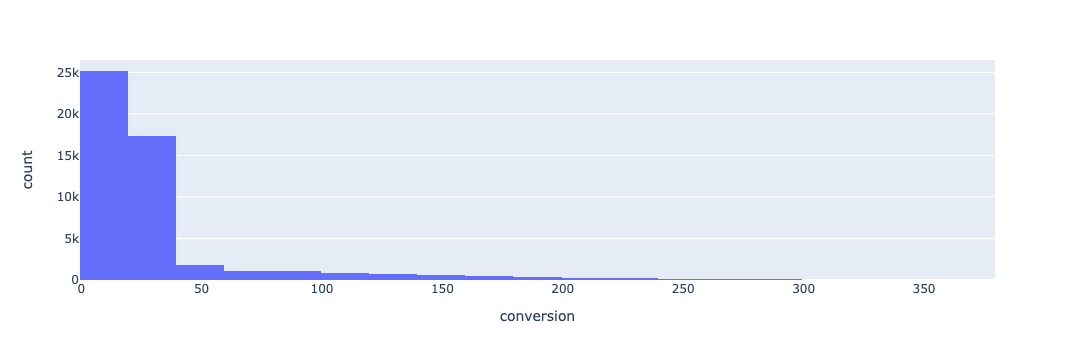

On average people start buying 20.0 days after their first visit,
and the overall conversion rate is 16.0%


In [11]:
first_order=orders.groupby(['uid'])['date'].min().reset_index()
first_order.columns = ['uid', 'first_order']
orders=orders.merge(first_visit, how='inner',on=['uid'])
orders=orders.merge(first_order, how='inner',on=['uid'])
orders['conversion']=((pd.to_datetime(orders['first_order'])-pd.to_datetime(orders['first_visit']))/np.timedelta64(1,'D')).astype('int')

fig = px.histogram(orders, x="conversion",nbins=30)
fig.show()

print('On average people start buying', orders['conversion'].median(),'days after their first visit,')
print('and the overall conversion rate is {:.1%}'.format(orders['uid'].nunique()/visits['uid'].nunique()))

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Great!

### 9) How many orders do they make during a given period of time?

In [12]:
#defining cohort month as first purchase
orders['first_order_month']=orders['first_order'].astype('datetime64[M]')
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']

# Number of monthly purchases organized by cohort
cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']

# How many orders do each customer make 
# during a given period of time?
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)
cohort_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

### 10) What is the average purchase size?

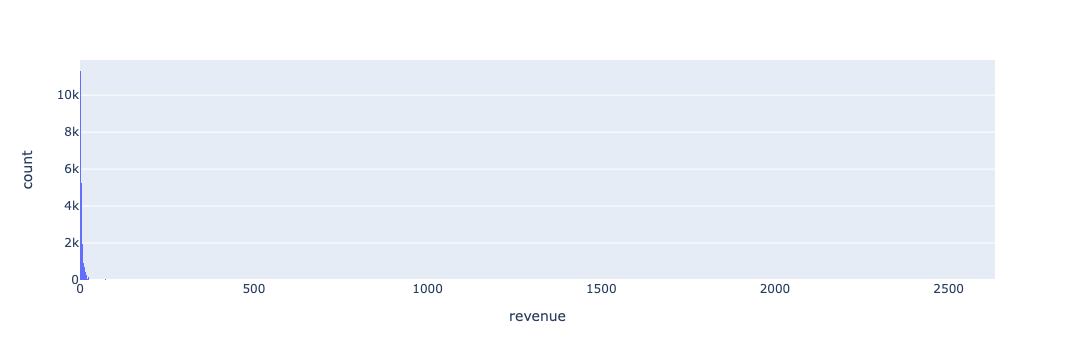

In [13]:
# calculating total check for each order and plotting it
avg_check=orders.groupby(['buy_ts','uid'])['revenue'].mean().reset_index()
fig = px.histogram(avg_check, x="revenue")
fig.show()

### This looks pretty unruly. Let's slice the data to make it more readable.

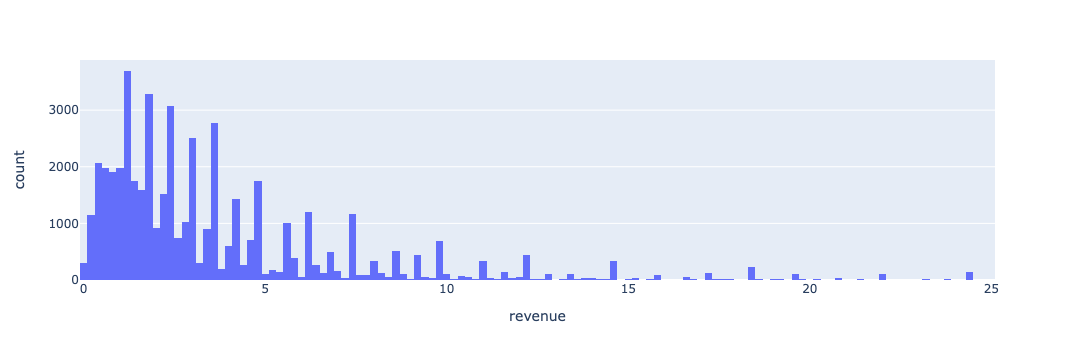

In [14]:
avg_check_slice=avg_check[avg_check['revenue']<25]
fig = px.histogram(avg_check_slice, x="revenue")
fig.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Nicely done

### Most customer's orders are low, and few customers have high priced orders.
### Cohort analysis on averge check:

In [15]:
avg_cohort=orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()

avg_cohort_piv=avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)
avg_cohort_piv.round(2).fillna('')

age_month          0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

age_month          8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

In [16]:
print('the median order is:',orders['revenue'].median())
print('the mean order is:',orders['revenue'].mean())

the median order is: 2.5
the mean order is: 4.999646930476922


### 11) How much money do they bring? (LTV)

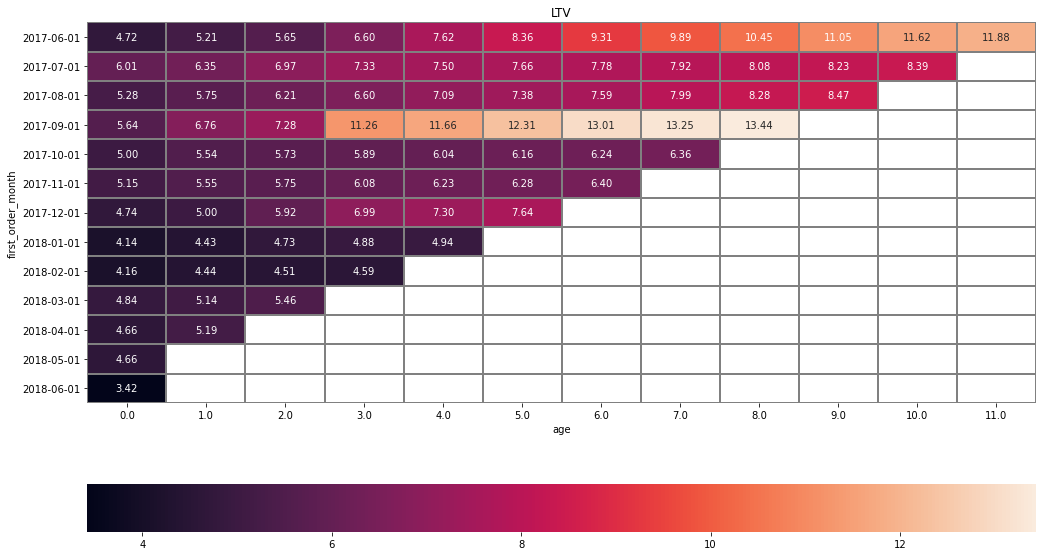

In [17]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']

ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
fig,ax=plt.subplots(figsize=(17,10))

sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

### The Cohort for September had the highest LTV after 6 months.

## 12) Marketing
### How much money was spent overall?

In [18]:
print('Total marketing cost is ${}'.format(costs['costs'].sum()))

Total marketing cost is $329131.62


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Correct

### 13) How much money was spent per source?

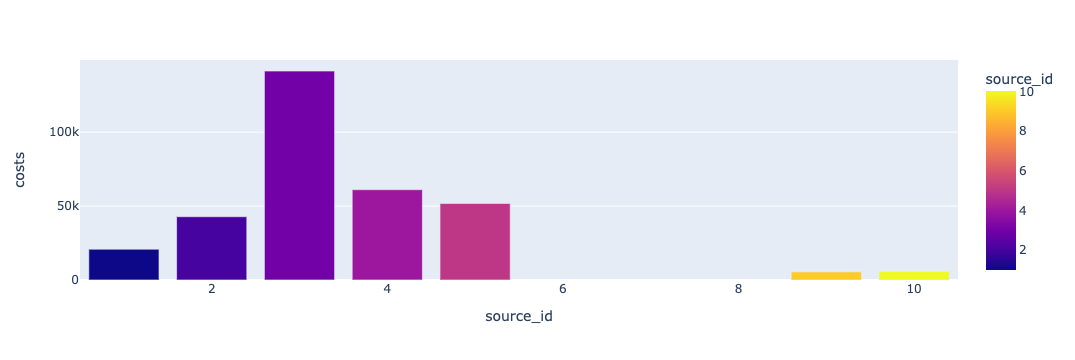

In [19]:
costs_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
costs=costs.sort_values(by=['dt','source_id'])

fig = px.bar(costs_per_source, x="source_id", y="costs", color='source_id')
fig.show()

### 14) How much money was spent over time?

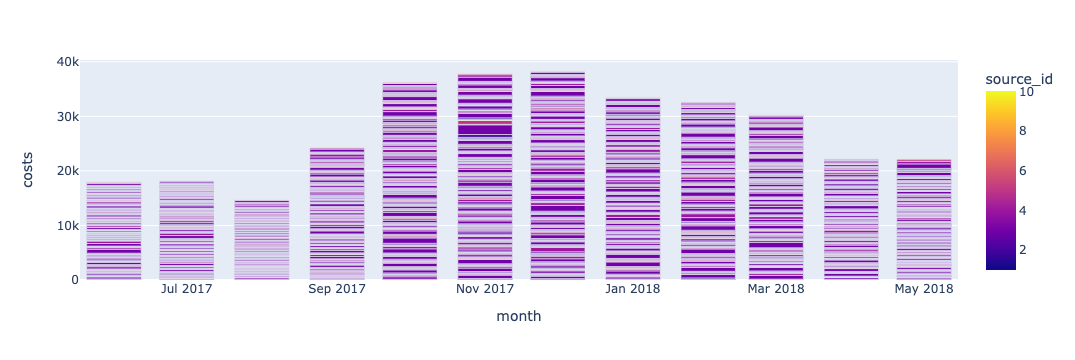

On average people start buying 20.0 days after their first visit,
and the overall conversion rate is 16.0%


In [20]:
# Hover over the bar to see more specific data
fig = px.bar(costs, x="month", y="costs", color='source_id')
fig.show()

print('On average people start buying', orders['conversion'].median(),'days after their first visit,')
print('and the overall conversion rate is {:.1%}'.format(orders['uid'].nunique()/visits['uid'].nunique()))

### 15) How much did customer acquisition from each of the sources cost?

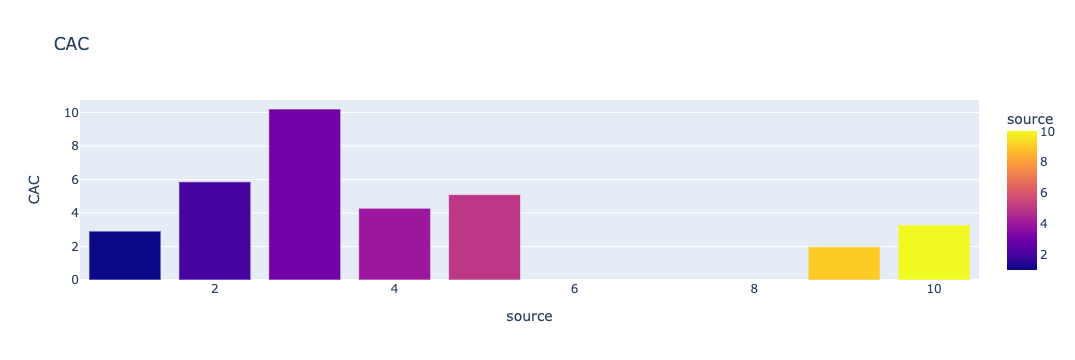

In [21]:
# Let's grab the source_id from 'visits'
first_source=visits.groupby(['uid','source_id'])['date'].min().reset_index()
first_source.columns = ['uid', 'first_source', 'first_source_date']
# And join 'orders' on 'first source'
orders=orders.merge(first_source, how='inner',on=['uid'])

visits=visits.merge(first_source, how='inner',on=['uid'])

costs_by_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_by_source.columns=['source','costs']

# keep from q15
buyers_by_source=orders.groupby(['first_source'])['uid'].nunique().reset_index()
buyers_by_source.columns=['source','buyers']

CAC_by_source=buyers_by_source.merge(costs_by_source,how='left',on=['source'])
CAC_by_source['CAC']=CAC_by_source['costs']/CAC_by_source['buyers']

fig = px.bar(CAC_by_source, x="source", y="CAC",title='CAC',color='source')
fig.show()

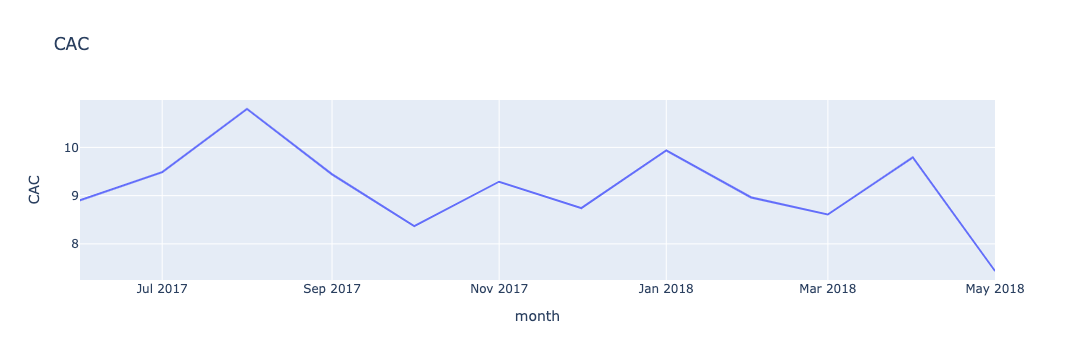

In [22]:
costs_by_month=costs.groupby(['month'])['costs'].sum().reset_index()
costs_by_month.columns=['month','costs']
buyers_by_month=orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_by_month.columns=['month','buyers']
CAC_by_month=costs_by_month.merge(buyers_by_month,how='left',on=['month'])
CAC_by_month['CAC']=CAC_by_month['costs']/CAC_by_month['buyers']

fig = px.line(CAC_by_month, x="month", y="CAC", title='CAC')
fig.show()

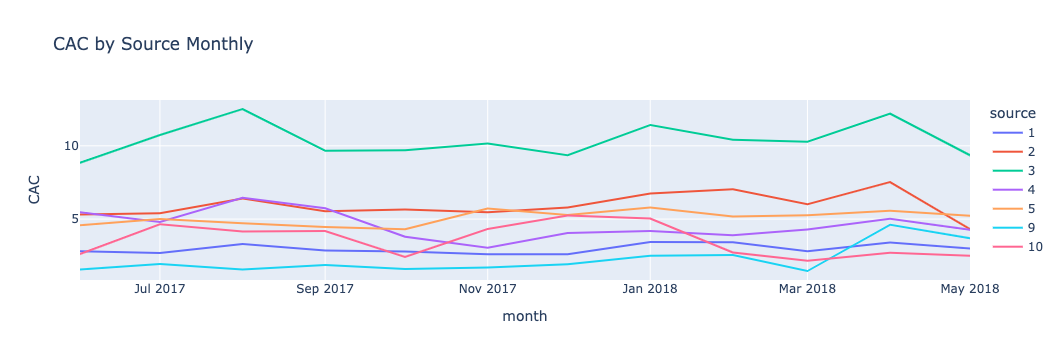

In [23]:
costs_by_month_source=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.columns=['month','source','costs']
buyers_by_month_source=orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_by_month_source.columns=['month','source','buyers']
CAC_by_month_source=costs_by_month_source.merge(buyers_by_month_source,how='left',on=['month','source'])
CAC_by_month_source['CAC']=CAC_by_month_source['costs']/CAC_by_month_source['buyers']

fig = px.line(CAC_by_month_source, x="month", y="CAC", title='CAC by Source Monthly',color='source')
fig.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Well done

### Source 3 has an unusually high Customer Acquisition Cost. 
### Source 10 has had their CAC drop in the past few months.
## 16) How worthwhile where the investments? (ROI)

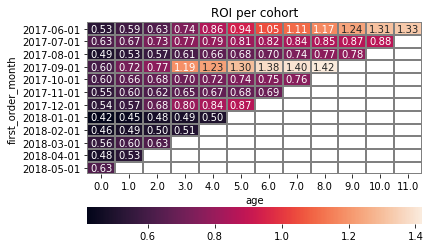

In [24]:
CAC_by_month_ROI=CAC_by_month[['month','CAC']]
CAC_by_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_by_month_ROI,on=['first_order_month'],how='left')
ROI['ROI']=ROI['ltv']/ROI['CAC']

roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 
roi_piv.index=roi_piv.index.astype(str)
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

### The June and September cohorts did very well. Perhaps because of the beginning of summer and the beginning of school. The rest, while getting closer to breaking even, have not managed to return their marketing costs.

<ipython-input-25-c6a27c8f8dd4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



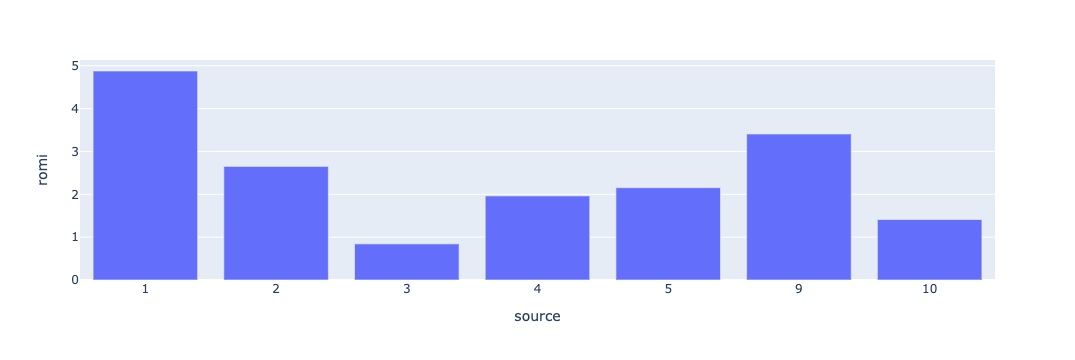

In [25]:
ltv_by_source=orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_by_source.columns=['source','buyers','revenue']
ltv_by_source['ltv']=ltv_by_source['revenue']/ltv_by_source['buyers']
roi_by_source=costs_by_source.merge(ltv_by_source,on=['source'])
roi_by_source['cac']=roi_by_source['costs']/roi_by_source['buyers']
roi_by_source['romi']=roi_by_source['ltv']/roi_by_source['cac']
fig = px.bar(roi_by_source, x='source', y='romi')
fig.update_xaxes(type='category')
fig.show()

###  Sources 1 and 9 have the highest return on marketing investment. Source 3 isn't even breaking even.
### 17a) Cohort average monthly revenue per Device

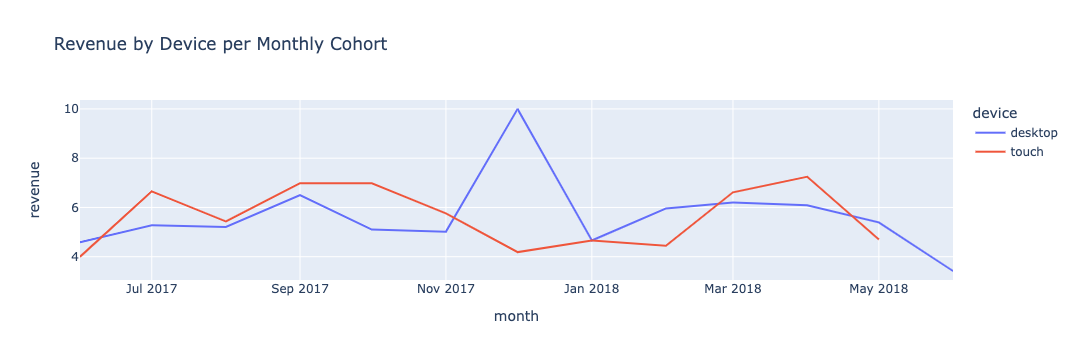

In [26]:
uid_device = visits.groupby('uid')['device'].max().reset_index()
orders=orders.merge(uid_device,on=['uid'])
revenue_by_month_device=orders.groupby(['month','device'])['revenue'].mean().reset_index()

fig = px.line(revenue_by_month_device, x="month", y="revenue", title='Revenue by Device per Monthly Cohort',color='device')
fig.show()

### Touch devices out earn desktop devices throughout the year. Desktop devices skyrocket above touch around the holidays.

### 17b) Cohort average monthly revenue per Source

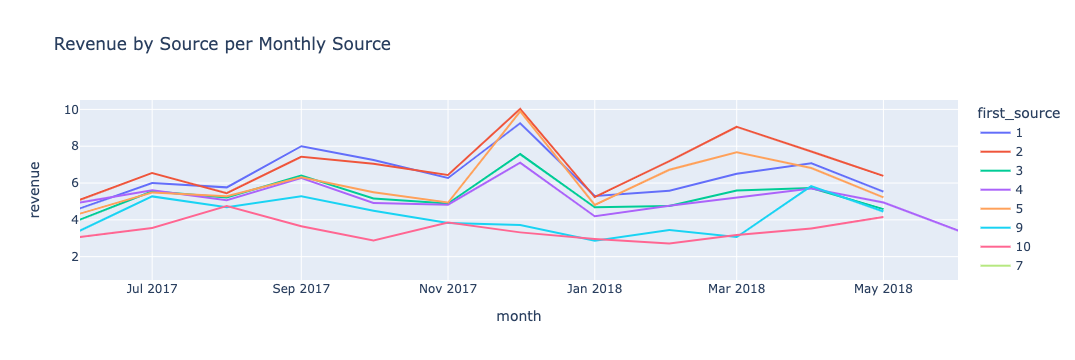

In [27]:
revenue_by_month_source=orders.groupby(['month','first_source'])['revenue'].mean().reset_index()
fig = px.line(revenue_by_month_source, x="month", y="revenue", title='Revenue by Source per Monthly Source',color='first_source')
fig.show()

### Sources 9 and 10 are consistently our lowest sources of revenue.   The remaining sources similarly fluctuate together throughout the year, peaking around the holidays.

## 18) Step 3. Conclusion
### Between December and March is when we have the most daily, weekly and monthly active users.  Daily active use peaks on weekends.
### On average people start buying 20.0 days after their first visit, and the overall conversion rate is 16.0%
### We should invest more in marketing for June and September. They are both very strong cohorts.  Perhaps it's because of school getting out and getting back in session. Let's look into this further.  
### The revenue from source 3 is in the middle of the pack, but its return on marketing investment is very low.   I suggest spending extra for the next couple of months to see how it affects source 3, if we can't make our ROMI break even, we should consider suspending investment in source 3 in the future.
### As the holidays approach, we should invest more in touch devices, and then during the holidays we should invest extra marketing on desktop machines.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Thanks for the final conclusion! You conducted great research.